## CSI 5137[C] Application of NLP and ML in Software Engineering 
## For 'JM1' Dataset
```
#Project : Predicting Software Bugs using Machine Learning algorithms 
Honey Patel - 300253332
Jay Patel - 300288159
```


### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Traning algorithms without resampling and feature selection 

###Importing the final dataset 

In [ ]:
dataset = pd.read_csv("jm1.csv")
#dataset = dataset.drop(dataset.columns[0],axis=1)
dataset

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False


## Data Preprocessing

### Checking for missing values

In [ ]:
#checking for missing values
print('Number of Missing values in each column')
dataset.isnull().sum()

Number of Missing values in each column


loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

### Checking for null values

In [ ]:
#checking for null values
dataset.isna().any()

loc                  False
v(g)                 False
ev(g)                False
iv(g)                False
n                    False
v                    False
l                    False
d                    False
i                    False
e                    False
b                    False
t                    False
lOCode               False
lOComment            False
lOBlank              False
locCodeAndComment    False
uniq_Op              False
uniq_Opnd            False
total_Op             False
total_Opnd           False
branchCount          False
defects              False
dtype: bool

### Checking for "?" in string values

In [ ]:
#checking for "?" in string values 
df1 = dataset[dataset["uniq_Op"].str.contains("\?", na=False)]
df2 = dataset[dataset["uniq_Opnd"].str.contains("\?", na=False)]
df3 = dataset[dataset["total_Op"].str.contains("\?", na=False)]
df4 = dataset[dataset["total_Opnd"].str.contains("\?", na=False)]
df5 = dataset[dataset["branchCount"].str.contains("\?", na=False)]
print(df1)
print(df2)

       loc  v(g)  ev(g)  iv(g)      n        v     l      d      i         e  \
143   49.0   4.0    3.0    3.0  185.0  1097.19  0.05  18.84  58.25  20667.93   
358   27.0   5.0    3.0    3.0   79.0   417.55  0.07  13.52  30.88   5646.37   
1598  76.0  18.0   11.0   11.0  275.0  1650.00  0.03  34.50  47.83  56925.00   
4214   6.0   1.0    1.0    1.0   15.0    51.89  0.34   2.92  17.79    151.35   
8279   9.0  13.0   10.0    4.0    0.0     0.00  0.00   0.00   0.00      0.00   

      ...  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
143   ...      38          0        9                  0        ?          ?   
358   ...      19          0        6                  0        ?          ?   
1598  ...      62          0       12                  0        ?          ?   
4214  ...       3          0        1                  0        ?          ?   
8279  ...       0          0        0                  0        ?          ?   

     total_Op total_Opnd branchCount d

### Handling "?" in the dataset

In [ ]:
#5 feature has "?" in their values, and here "?" means missing values, so change "?" to "NaN"
dataset.replace("?", np.nan, inplace = True)  #change "?" to null values, so we can replace it.

In [ ]:
dataset.isna().any()  #check for null values

loc                  False
v(g)                 False
ev(g)                False
iv(g)                False
n                    False
v                    False
l                    False
d                    False
i                    False
e                    False
b                    False
t                    False
lOCode               False
lOComment            False
lOBlank              False
locCodeAndComment    False
uniq_Op               True
uniq_Opnd             True
total_Op              True
total_Opnd            True
branchCount           True
defects              False
dtype: bool

In [ ]:
#replacing null values with median
dataset.loc[(dataset['uniq_Op'].isnull() == True), 'uniq_Op'] = dataset['uniq_Op'].median()
dataset.loc[(dataset['uniq_Opnd'].isnull() == True), 'uniq_Opnd'] = dataset['uniq_Opnd'].median()  
dataset.loc[(dataset['total_Op'].isnull() == True), 'total_Op'] = dataset['total_Op'].median()
dataset.loc[(dataset['total_Opnd'].isnull() == True), 'total_Opnd'] = dataset['total_Opnd'].median()
dataset.loc[(dataset['branchCount'].isnull() == True), 'branchCount'] = dataset['branchCount'].median()   
dataset.isna().any() 

loc                  False
v(g)                 False
ev(g)                False
iv(g)                False
n                    False
v                    False
l                    False
d                    False
i                    False
e                    False
b                    False
t                    False
lOCode               False
lOComment            False
lOBlank              False
locCodeAndComment    False
uniq_Op              False
uniq_Opnd            False
total_Op             False
total_Opnd           False
branchCount          False
defects              False
dtype: bool

### Changing variables of object type to float64

In [ ]:
dataset.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op               object
uniq_Opnd             object
total_Op              object
total_Opnd            object
branchCount           object
defects                 bool
dtype: object

In [ ]:
dataset["uniq_Op"] = dataset["uniq_Op"].astype(dtype='float64')
dataset["uniq_Opnd"] = dataset["uniq_Opnd"].astype(dtype='float64')
dataset["total_Op"] = dataset["total_Op"].astype(dtype='float64')
dataset["total_Opnd"] = dataset["total_Opnd"].astype(dtype='float64')
dataset["branchCount"] = dataset["branchCount"].astype(dtype='float64')

In [ ]:
#dataset with only float64 and int64 type
dataset.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

### Categorizing the Dataset into different dataframes

In [ ]:
#taking only numeric data
dataset_numeric = dataset[["v(g)", "ev(g)", "iv(g)", "n", "v", "l",	"d", "i", "e", "b", "t", "lOCode", "lOComment", "lOBlank", "locCodeAndComment", "uniq_Op",	"uniq_Opnd",	"total_Op",	"total_Opnd", "branchCount"]].copy()
dataset_numeric.head()

,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51,10,8,1,17.0,36.0,112.0,86.0,13.0
3,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129,29,28,2,17.0,135.0,329.0,271.0,5.0
4,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28,1,6,0,11.0,16.0,76.0,50.0,7.0


In [ ]:
#taking only the target label
dataset_target = dataset[["defects"]].copy()
dataset_target.head()

,defects
0,False
1,True
2,True
3,True
4,True


### Combining the dataframes

In [ ]:
frames = [dataset_numeric, dataset_target]
dataset = pd.concat(frames, axis=1)
dataset

,v(g),ev(g),iv(g),n,v,l,d,i,e,b,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,...,51,10,8,1,17.0,36.0,112.0,86.0,13.0,True
3,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,...,129,29,28,2,17.0,135.0,329.0,271.0,5.0,True
4,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,...,28,1,6,0,11.0,16.0,76.0,50.0,7.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,0.08,...,13,0,2,0,10.0,15.0,30.0,22.0,7.0,False
10881,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,0.04,...,5,0,2,0,12.0,8.0,19.0,11.0,3.0,False
10882,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,0.17,...,29,1,10,0,18.0,15.0,59.0,44.0,7.0,False
10883,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,0.05,...,6,0,2,0,9.0,8.0,21.0,15.0,1.0,False


### Spliting the dataset

In [ ]:
X = dataset.drop("defects", axis=1)
y = dataset.defects

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

### Feature Scaling on numeric data

In [ ]:
numerical_features = ["v(g)", "ev(g)", "iv(g)", "n", "v", "l",	"d", "i", "e", "b", "t", "lOCode", "lOComment", "lOBlank", "locCodeAndComment", "uniq_Op",	"uniq_Opnd",	"total_Op",	"total_Opnd", "branchCount"]
scaler = StandardScaler()

transformer = ColumnTransformer([("scaler", scaler, numerical_features)], remainder = "passthrough")
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)
X_train = transformed_X_train
X_test = transformed_X_test

## Applying algorithms and Training models using 10 fold cross validation

### Defining the models : Decision tree, Random forest, Logistic Regression, SVM, KNN, Navie Bayes

In [ ]:
model1 = DecisionTreeClassifier(criterion='entropy')
model2 = RandomForestClassifier(n_estimators = 200, criterion='entropy') 
model3 = LogisticRegression(C=1)
model4 = LinearSVC(C = 1.0) 
model5 = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
model6 = GaussianNB()
#model7 = MLPClassifier(hidden_layer_sizes=(50,51), max_iter=200, activation='relu', learning_rate='constant', alpha=0.05)

### 10-fold Cross Validation using cross_val_score function

In [ ]:
def model_train(X, y, X_train, X_test, y_train, y_test) :
    Rc_cross_accuracy = []
    Dc_cross_accuracy = []
    Lr_cross_accuracy = []
    Sc_cross_accuracy = []
    Kn_cross_accuracy = []
    Nb_cross_accuracy = []
    Rscore = []
    Dscore = []
    Lscore = []
    Sscore = []
    Kscore = []
    Nscore = []

    Dc_cross_accuracy = cross_val_score(model1, X, y, cv=10)
    print("\n\n--------------------------------------------- For Decision Tree Classifier ---------------------------------------------")
    Dscore = (np.mean(Dc_cross_accuracy))*100
    model1.fit(X_train,y_train)
    dy_pred = model1.predict(X_test)
    print("\nAccuracy by cross_val_score fuction : ", Dscore)
    print("F1 score : ",f1_score(y_test, dy_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, dy_pred))
    print("\nClassification Report : \n",metrics.classification_report(y_test, dy_pred))

    Rc_cross_accuracy = cross_val_score(model2, X, y, cv=10)
    print("\n---------------------------------------------- For Random Forest Classifier ----------------------------------------------")
    Rscore = (np.mean(Rc_cross_accuracy))*100
    model2.fit(X_train,y_train)
    ry_pred = model2.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Rscore)
    print("F1 score : ",f1_score(y_test, ry_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, ry_pred))
    print("\nClassification Report : \n",metrics.classification_report(y_test, ry_pred))

    Lr_cross_accuracy = cross_val_score(model3, X, y, cv=10)
    print("\n------------------------------------------------- For Logistic Regression -------------------------------------------------")
    Lscore = (np.mean(Lr_cross_accuracy))*100
    model3.fit(X_train,y_train)
    ly_pred = model3.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Lscore)
    print("F1 score : ",f1_score(y_test, ly_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, ly_pred))
    print("\nClassification Report :- \n",metrics.classification_report(y_test, ly_pred))

    Sc_cross_accuracy = cross_val_score(model4, X, y, cv=10)
    print("\n----------------------------------------------- For Support Vector Classifier -----------------------------------------------")
    Sscore = (np.mean(Sc_cross_accuracy))*100
    model4.fit(X_train,y_train)
    sy_pred = model4.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Sscore)
    print("F1 score : ",f1_score(y_test, sy_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, sy_pred))
    print("\nClassification Report :- \n",metrics.classification_report(y_test, sy_pred))

    Kn_cross_accuracy = cross_val_score(model5, X, y, cv=10)
    print("\n-------------------------------------------------- For K-Nearest Neighbors --------------------------------------------------")
    Kscore = (np.mean(Kn_cross_accuracy))*100
    model5.fit(X_train, y_train)
    ky_pred = model5.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Kscore)
    print("F1 score : ",f1_score(y_test, ky_pred)) 
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, ky_pred))
    print("\nClassification Report :- \n",metrics.classification_report(y_test, ky_pred))

    Nb_cross_accuracy = cross_val_score(model6, X, y, cv=10)
    print("\n------------------------------------------------ For Navie Bayes Classifier ------------------------------------------------")
    Nscore = (np.mean(Nb_cross_accuracy))*100
    model6.fit(X_train,y_train)
    ny_pred = model6.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Nscore)
    print("F1 score : ",f1_score(y_test, ny_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, ny_pred))
    print("\nClassification Report :- \n",metrics.classification_report(y_test, ny_pred))

    return Dscore, Rscore, Lscore, Sscore, Kscore, Nscore

### Training the models and getting Accuracy, F1_Score, Confusion matrix, Classification report (precision, recall, support)

In [ ]:
Dscore, Rscore, Lscore, Sscore, Kscore, Nscore = model_train(X, y, X_train, X_test, y_train, y_test)



--------------------------------------------- For Decision Tree Classifier ---------------------------------------------

Accuracy by cross_val_score fuction :  72.72414148166153
F1 score :  0.36093943139678614

Confusion Matrix :-
 [[1514  242]
 [ 275  146]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.85      0.86      0.85      1756
        True       0.38      0.35      0.36       421

    accuracy                           0.76      2177
   macro avg       0.61      0.60      0.61      2177
weighted avg       0.76      0.76      0.76      2177


---------------------------------------------- For Random Forest Classifier ----------------------------------------------
Accuracy by cross_val_score fuction :  79.78914310214445
F1 score :  0.3116438356164384

Confusion Matrix :-
 [[1684   72]
 [ 330   91]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.84      0.96      0.

# Applying Feature selection, and Hyperparameter tuning to improve the accuracy and training algorithms  

In [ ]:
X = dataset.drop("defects", axis=1)
y = dataset.defects

## Feature Selection


In [ ]:
for label, content in dataset.items():
    if pd.api.types.is_string_dtype(content):
        dataset[label] = content.astype("category")

### Correlation Matrix

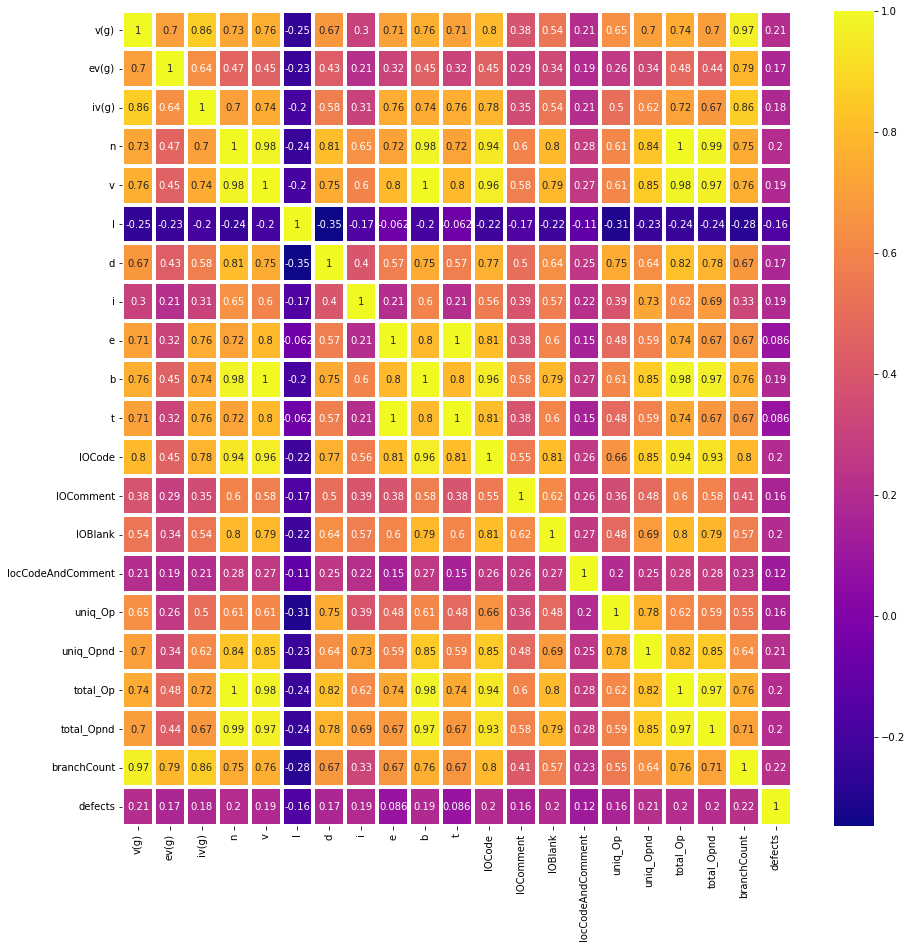

In [ ]:
plt.figure(figsize=(15,15))
corr = dataset.corr()
sns.heatmap(corr, annot = True, linewidths=3, cmap="plasma")

In [ ]:
corr_series = abs(corr.defects).sort_values(ascending = False)
top = pd.Series()
names = []
locations = []
for index, value in corr_series.items():
    if pd.api.types.is_float(value):
        if value > 0.085:
            names.append(value)
            locations.append(index)
      
names = names [1:]
locations = locations [1:]

values = pd.Series(names, index = locations)

top = top.append(values)
top

branchCount          0.222486
uniq_Opnd            0.211722
v(g)                 0.208644
n                    0.204143
total_Opnd           0.203571
total_Op             0.200742
lOBlank              0.199644
lOCode               0.195897
i                    0.192831
b                    0.189342
v                    0.189136
iv(g)                0.181984
ev(g)                0.172973
d                    0.169629
l                    0.164917
lOComment            0.160887
uniq_Op              0.158731
locCodeAndComment    0.117891
t                    0.086036
e                    0.086036
dtype: float64

### Finding Absolute Value of Correlation of features with each other

In [ ]:
i_visited  = []
to_be_removed = []
all_indexes = []
for index, value in top.items():
    for index1, value in top.items():
        if(index not in all_indexes):
            all_indexes.append(index)
        if(abs(dataset[index].corr(dataset[index1]))) > 0.5 and index != index1:
            if(index not in i_visited and index1 not in i_visited):
                i_visited.append(index)
                i_visited.append(index1)
                to_be_removed.append(index1)
                print(f"The Absolute Value of Correlation For {index} and {index1} is: {dataset[index].corr(dataset[index1])}")

The Absolute Value of Correlation For branchCount and uniq_Opnd is: 0.6443042168222377
The Absolute Value of Correlation For v(g) and n is: 0.7307808919232818
The Absolute Value of Correlation For total_Opnd and total_Op is: 0.9726940459237385
The Absolute Value of Correlation For lOBlank and lOCode is: 0.8073193947447812
The Absolute Value of Correlation For i and b is: 0.5983413673428738
The Absolute Value of Correlation For v and iv(g) is: 0.7431933447569425
The Absolute Value of Correlation For d and lOComment is: 0.502121336100475
The Absolute Value of Correlation For t and e is: 0.9999999999998007


In [ ]:
all_indexes, to_be_removed #features to be removed

(['branchCount',
  'uniq_Opnd',
  'v(g)',
  'n',
  'total_Opnd',
  'total_Op',
  'lOBlank',
  'lOCode',
  'i',
  'b',
  'v',
  'iv(g)',
  'ev(g)',
  'd',
  'l',
  'lOComment',
  'uniq_Op',
  'locCodeAndComment',
  't',
  'e'],
 ['uniq_Opnd', 'n', 'total_Op', 'lOCode', 'b', 'iv(g)', 'lOComment', 'e'])

In [ ]:
dataset=dataset.drop(to_be_removed,axis=1)

### New dataset with features selection

In [ ]:
dataset.head()

,v(g),ev(g),v,l,d,i,t,lOBlank,locCodeAndComment,uniq_Op,total_Opnd,branchCount,defects
0,1.4,1.4,1.30,1.30,1.30,1.30,1.30,2,2,1.2,1.2,1.4,False
1,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1,1,1.0,1.0,1.0,True
2,7.0,1.0,1134.13,0.05,20.31,55.85,1279.39,8,1,17.0,86.0,13.0,True
3,3.0,1.0,4348.76,0.06,17.06,254.87,4122.37,28,2,17.0,271.0,5.0,True
4,4.0,1.0,599.12,0.06,17.19,34.86,572.07,6,0,11.0,50.0,7.0,True


## Spliting the dataset and getting new X and y after feature selection and Hyperparamter tuning

In [ ]:
X_fsh = dataset.drop("defects", axis=1)
y_fsh = dataset.defects

X_train_fsh, X_test_fsh, y_train_fsh, y_test_fsh = train_test_split(X_fsh, y_fsh, test_size = 0.2, stratify=y_fsh)

## Feature Scaling the updated dataset with X_fsh, y_fsh

In [ ]:
numerical_features = X_fsh.columns
scaler = StandardScaler()

transformer = ColumnTransformer([("scaler", scaler, numerical_features)], remainder = "passthrough")
transformed_X_train_fsh = transformer.fit_transform(X_train_fsh)
transformed_X_test_fsh = transformer.transform(X_test_fsh)
X_train_fsh = transformed_X_train_fsh
X_test_fsh = transformed_X_test_fsh

##Hyperparameter Tuning 

### Making dictionary of algorithms and parameters we want to tune in hyperparameter tuning

In [ ]:
model_params = {
    
    'Decision_tree': {
        'model': DecisionTreeClassifier(ccp_alpha=0.3,min_samples_split = 2, min_samples_leaf=10),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth' : [1,2,3,5,9,7], 
            #'min_samples_leaf' : [i for i in range(1, 16)],
            #'ccp_alpha' : [0.1, 0.2, 0.3, 0.4, 0.5],
        }
    },

    'Random_forest': {
        'model': RandomForestClassifier(min_samples_split = 2, min_samples_leaf=10),
        'params' : {
            'criterion': ['gini','entropy'],
            'n_estimators': [100, 300, 500, 700, 1000],
            'max_depth' : [10, 20, 30, 40, 50],
            #'min_samples_split' : [2, 5, 10, 15, 100],
            #'max_features': [i for i in range(5, 52, 5)]
        }
    },

    'LR' : {
        'model': LogisticRegression(),
        'params': {
            'penalty' : ['l1', 'l2', 'elasticnet','None'],
            'C': [0.5, 0.25, 0.75, 1, 1.25, 1.75],
            'max_iter' : [100, 200, 300]
        }
    }, 

    'SVM': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.25, 0.5, 0.75, 1, 1.25, 1.75],
            #'gamma': ['scale', 'auto']
        }  
    },

    'KNN' : {
        'model': KNeighborsClassifier(metric='minkowski', p = 2),
        'params': {
            'n_neighbors': [5, 10, 15, 20, 25, 30],
            'weights':['uniform','distance'],
            #'metric':['minkowski', 'euclidean', 'manhattan']
        }
    }, 

    'Navie Bayes' : {
        'model':  GaussianNB(),
        'params': {
            'var_smoothing' : [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e10, 1e9, 1e8, 1e7, 1e6, 1e5, 1e4, 1e3, 1e2, 1e1]
        }
    }

}

### Applying Grid Search to find the best model and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search(dataset) :
    scores = []

    for model_name, mp in model_params.items():
        gd =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False, verbose=1, n_jobs=-1)
        gd.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': gd.best_score_,
            'best_params': gd.best_params_
        })
        
    df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
    df
    return(df)

In [ ]:
#getting the best score and best parameters 
df = grid_search(dataset)
print(df)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 50 candidates, totalling 100 fits
Fitting 2 folds for each of 72 candidates, totalling 144 fits
Fitting 2 folds for each of 6 candidates, totalling 12 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 21 candidates, totalling 42 fits
           model  best_score  \
0  Decision_tree    0.806523   
1  Random_forest    0.799358   
2             LR    0.804870   
3            SVM    0.801654   
4            KNN    0.796969   
5    Navie Bayes    0.809830   

                                         best_params  
0              {'criterion': 'gini', 'max_depth': 1}  
1  {'criterion': 'gini', 'max_depth': 40, 'n_esti...  
2      {'C': 0.25, 'max_iter': 100, 'penalty': 'l2'}  
3                                        {'C': 0.25}  
4          {'n_neighbors': 20, 'weights': 'uniform'}  
5                            {'var_smoothing': 0.01}  


###Defining the models with best parameters

In [ ]:
model1 = DecisionTreeClassifier(criterion=df.iloc[0]['best_params']['criterion'], max_depth=df.iloc[0]['best_params']['max_depth'], ccp_alpha=0.3, min_samples_leaf=10, min_samples_split=2)
model2 = RandomForestClassifier(criterion=df.iloc[1]['best_params']['criterion'], n_estimators=df.iloc[1]['best_params']['n_estimators'], max_depth=df.iloc[1]['best_params']['max_depth'], min_samples_split=2, min_samples_leaf=10) #max_features=df.iloc[1]['best_params']['max_features']) 
model3 = LogisticRegression(penalty=df.iloc[2]['best_params']['penalty'], C=df.iloc[2]['best_params']['C'], max_iter=df.iloc[2]['best_params']['max_iter'])
model4 = SVC(C=df.iloc[3]['best_params']['C'], gamma='auto') 
model5 = KNeighborsClassifier(n_neighbors=df.iloc[4]['best_params']['n_neighbors'], weights=df.iloc[4]['best_params']['weights'],  metric='minkowski', p = 2)
model6 = GaussianNB(var_smoothing=df.iloc[5]['best_params']['var_smoothing'])
#model7 = MLPClassifier(hidden_layer_sizes=df.iloc[6]['best_params']['hidden_layer_sizes'], max_iter=df.iloc[6]['best_params']['max_iter'], activation=df.iloc[6]['best_params']['activation'], learning_rate='constant', solver='adam', alpha=df.iloc[6]['best_params']['alpha'])

### Training the models using 10-fold cross validation and getting Accuracy

In [ ]:
#models defined above and getting accuracy by calling the funcation model_train
Dscore_fsh, Rscore_fsh, Lscore_fsh, Sscore_fsh, Kscore_fsh, Nscore_fsh = model_train(X_fsh, y_fsh, X_train_fsh, X_test_fsh, y_train_fsh, y_test_fsh)



--------------------------------------------- For Decision Tree Classifier ---------------------------------------------

Accuracy by cross_val_score fuction :  88.15228656889752
F1 score :  0.0

Confusion Matrix :-
 [[1756    0]
 [ 421    0]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.81      1.00      0.89      1756
        True       0.00      0.00      0.00       421

    accuracy                           0.81      2177
   macro avg       0.40      0.50      0.45      2177
weighted avg       0.65      0.81      0.72      2177


---------------------------------------------- For Random Forest Classifier ----------------------------------------------
Accuracy by cross_val_score fuction :  86.66195882623022
F1 score :  0.22529644268774704

Confusion Matrix :-
 [[1728   28]
 [ 364   57]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.83      0.98      0.90      1756
  

## Table showing the accuracies of the six algorithms before and after hyperparameter tunning and feature selection

In [46]:
Acc = [Dscore, Rscore, Lscore, Sscore, Kscore, Nscore]
Acc_fsh = [Dscore_fsh, Rscore_fsh, Lscore_fsh, Sscore_fsh, Kscore_fsh, Nscore_fsh]

table_final = np.column_stack((Acc, Acc_fsh))
table_frame = pd.DataFrame(table_final, columns = ['Accuracy_befr_HPT', 'Accuracy_wth_HPT_FS'], 
                                 index = ['Decision_Tree', 'Random_Forest', 'Logistic_Regression', 'SVM', 'KNN', 'Naive_Bayes'])
table_frame

,Accuracy_befr_HPT,Accuracy_wth_HPT_FS
Decision_Tree,72.724141,88.152287
Random_Forest,79.789143,86.661959
Logistic_Regression,78.558547,82.897533
SVM,72.249762,86.588016
KNN,79.458227,82.675183
Naive_Bayes,80.395676,87.854670


## Feature Ranking 

In [44]:
import sys
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

#Feature Ranking
res =  mutual_info_classif(X, y)
res = [0.21819637, 0.26307731,0.02089729,0.10408425,0.11165286,0.00157417
, 0.18526162, 0.20435355, 0.22257146, 0.21166985, 0.16536938, 0.22514492,
 0.18096379, 0.17603666, 0.02876315, 0.14915057, 0.10985039, 0.03965201,
 0.07511509, 0.0803626,  0.06559521, 0.0218448,  0.15778717,
 0.13496679, 0.01078187, 0.04066395]
features_name = ["v(g)", "ev(g)", "iv(g)", "n", "v", "l",	"d", "i", "e", "b", "t", "lOCode", "lOComment", "lOBlank", "locCodeAndComment", "uniq_Op",	"uniq_Opnd",	"total_Op",	"total_Opnd", "branchCount"]
features = []
for ind, i in enumerate(features_name):
    features.append([i, res[ind]])

features = sorted(features, key= lambda x:x[1], reverse= True)
for i in features:
    print(i[0],"\t",i[1])

ev(g) 	 0.26307731
lOCode 	 0.22514492
e 	 0.22257146
v(g) 	 0.21819637
b 	 0.21166985
i 	 0.20435355
d 	 0.18526162
lOComment 	 0.18096379
lOBlank 	 0.17603666
t 	 0.16536938
uniq_Op 	 0.14915057
v 	 0.11165286
uniq_Opnd 	 0.10985039
n 	 0.10408425
branchCount 	 0.0803626
total_Opnd 	 0.07511509
total_Op 	 0.03965201
locCodeAndComment 	 0.02876315
iv(g) 	 0.02089729
l 	 0.00157417
